# 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("../Materials/KVO_META.csv",
                 encoding='latin-1', index_col=False)


# Checking similarity and variation across the seasons.

In [5]:
recency = df[['Collection', 'Original title']]
recency = recency.set_index('Collection')

column_name = 'Original title'

# create the dictionary
unique_dict = {}
for index, row in recency.iterrows():
    if row[column_name] not in unique_dict.get(index, []):
        unique_dict.setdefault(index, []).append(row[column_name])

print(len(unique_dict))


31


<BarContainer object of 31 artists>

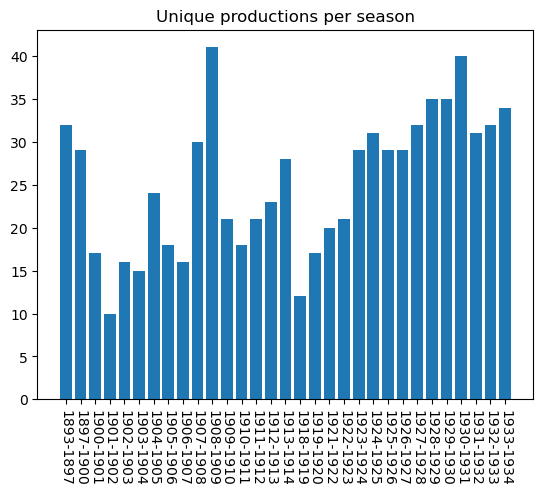

In [6]:
x = []
y = []
for key, values in unique_dict.items():
    x.append(key)
    y.append(len(values))

plt.xticks(rotation=270)
plt.title('Unique productions per season')
plt.bar(x, y)


We now have a dictionary in which the key is the season and the value is a list of all the unique productions that were performed that season. <br>
In the plot above we can see that there is are some differences in the variations of productions.<br>
Now I want to perform a cosine similarity test on the individual lists, to check how different the neighbouring seasons are.
<br>
I expect the similarity scores are very low across consecutive seasons, but relatively similar within the entire oevre. (how can we test this)?

In [7]:
from collections import Counter


def length_similarity(c1, c2):
    lenc1 = sum(c1.values())
    lenc2 = sum(c2.values())
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))


def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)


def similarity_score(l1, l2):
    c1, c2 = Counter(l1), Counter(l2)
    return length_similarity(c1, c2) * counter_cosine_similarity(c1, c2)


counter = 0
output = []

while counter < len(x)-1:
    output.append(similarity_score(x[counter], x[counter+1]))
    counter += 1


Text(0.5, 1.0, 'Similarity score across the seasons')

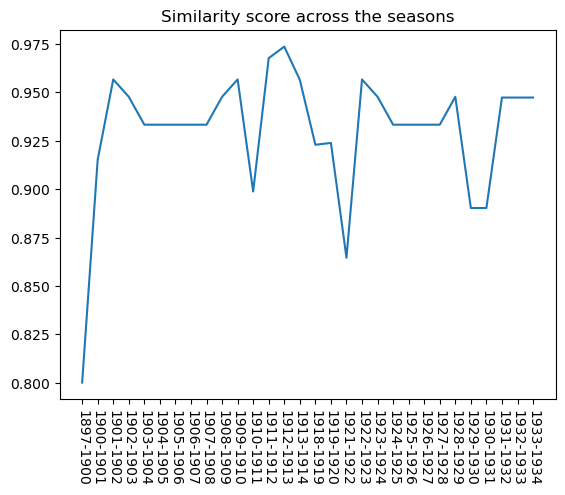

In [8]:
plt.plot(list(unique_dict.keys())[1::], output)
plt.xticks(rotation=270)
#plt.title('Unique productions per season')

plt.title('Similarity score across the seasons')

# Heel lage similatity met 1914 na de heropening, wat te verwachten valt.
#


# Poisson test

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv",
                 encoding='latin-1', index_col=False)

df.head()
df['Datum'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [11]:
value_counts = df['Normalised title'].value_counts()
df['frequency'] = df['Normalised title'].apply(lambda x: value_counts[x])


In [12]:
table = pd.pivot_table(df, values='Image', index=['Collection'], columns=['Normalised title'], aggfunc='count')
table.head()

Normalised title,'T Minnebrugje,Abu-Hassan,Alpenlied,Anita,Arendsnest,Baldie,Bastien en Bastienne,Bergliot,Bolero,Carmen,...,Winternachtsdroom,Winternachtsdroom,Zampa,ZeeVolk,ZeeVolk,Zigeunerliefde,Zooals Voorheen,Zriny,Zwaargewicht ( of De eer van't Land),concert P. Benoit
Collection,,,,,,,,,,,,,,,,,,,,,
1893-1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0
1897-1900,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-1901,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def first_second(column):   
    #ophalen van de index van de eerste productie
    first_not_nan_idx = table[column].notna().idxmax()
    try:
        # get the index of the second non-NaN value
        second_not_nan_idx = table[column].dropna().index[1]
    except IndexError: #we krijgen een error als de voorstelling slechts in één seizoen werd opgevoerd. in dat geval is eerste ook de tweede index.
        second_not_nan_idx = first_not_nan_idx
    return first_not_nan_idx, second_not_nan_idx

In [14]:
#we passen deze functie toe op alle kolommen (i.e. alle producties in de draaitabel)
#we slaan dit op in een output dictionary waar de titel van de productie de key is een de waarden een tuple (eerste seizoen, tweede seizoen).
output = {}
for col in table.columns:
    output[col] = first_second(col)

#we maken dan een dictionary waar wel telkens het verschil nemen van de grootste getal van de twee seizoen  (in het geval van 1911-1912 zou dat 1912 zijn).
#dit getal slagen we ook op met de productie titels als key en het verschil als value.

verschil = {}

for key, rang in output.items():
    first = int(rang[0][5::])
    second = int(rang[1][5::])
    verschil[key] = second - first

In [17]:
df = df.drop(columns=[ 'Performances_ID','Image', 'Production', 'Occasion', 'Multiple bill', 'World-premiere', 'Original title', 'Genre', 'Directors'])

In [18]:
def add_verschil (row):
    for key, values in verschil.items():
        if row == key:
            
            return values
    else:
        return 'N/A'

In [20]:
#we voegen een kolom toe dat aangeeft hoe veel seizoenen later deze productie nog eens opgevoerd werd. 
#Als dit 0 is werd deze productie dus slechts binnen één seizoen opgevoerd.
df['diff'] = df['Normalised title'].apply(add_verschil)
df.head()

,Collection,Date,Normalised title,Original language,Composer,Datum,frequency,diff
0,1893-1897,1893-10-03,De Vrijschutter,DUI,Carl Maria von Weber,1893-10-03,63,3
1,1893-1897,1893-10-05,Willem Tell,DUI,Carl Reinecke,1893-10-05,2,0
2,1893-1897,1893-10-10,De Vrijschutter,DUI,Carl Maria von Weber,1893-10-10,63,3
3,1893-1897,1893-10-12,Willem Tell,DUI,Carl Reinecke,1893-10-12,2,0
4,1893-1897,1893-11-16,Charlotte Corday,NL,Peter Benoit,1893-11-16,7,4


In [21]:
import numpy as np
from scipy.stats import poisson

(array([1.20805369e-01, 2.56524981e-01, 2.98036291e-01, 2.27193637e-01,
        1.26522496e-01, 5.29455630e-02, 2.13770818e-02, 5.96569724e-03,
        1.49142431e-03, 2.48570718e-04]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

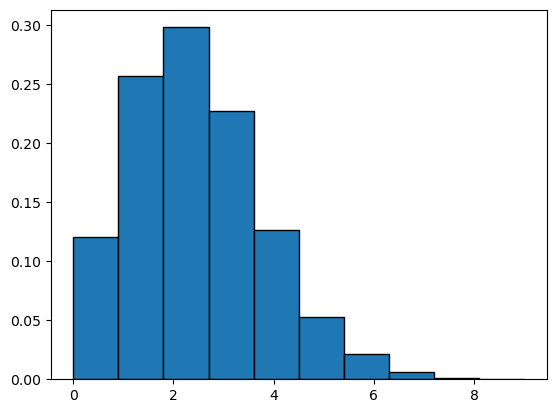

In [22]:
#?
x = poisson.rvs(mu=df['diff'].mean(), size=len(df))
plt.hist(x, density=True, edgecolor='black')